C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


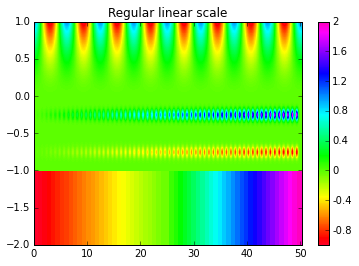

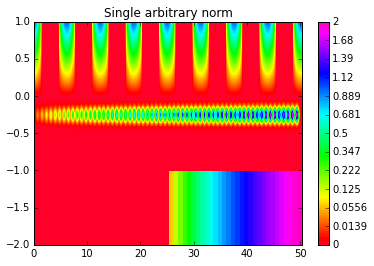

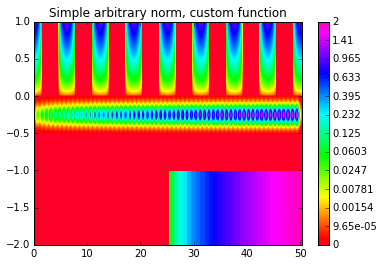

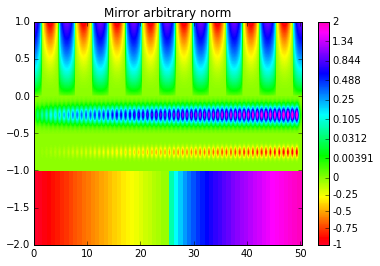

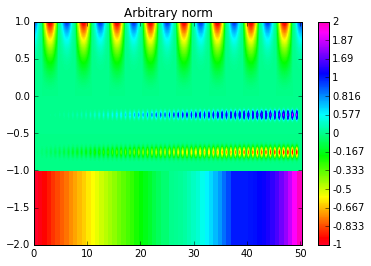

In [1]:
%matplotlib inline
"""
============================================
Examples of arbitrary colormap normalization
============================================

Here I plot an image array with data spanning for a large dynamic range, 
using different normalizations. Look at how each of them enhances
different features.

"""

import ArbitraryNorm as colors

import numpy as np
#import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xmax = 16 * np.pi
x = np.linspace(0, xmax, 1024)
y = np.linspace(-2, 1, 512)
X, Y = np.meshgrid(x, y)

data = np.zeros(X.shape)


def gauss2d(x, y, a0, x0, y0, wx, wy):
    return a0 * np.exp(-(x - x0)**2 / wx**2 - (y - y0)**2 / wy**2)

N = 61
for i in range(N):
    data = data + gauss2d(X, Y, 2. * i / N, i *
                          (xmax / N), -0.25, xmax / (3 * N), 0.07)
    data = data - gauss2d(X, Y, 1. * i / N, i *
                          (xmax / N), -0.75, xmax / (3 * N), 0.07)

data[Y > 0] = np.cos(X[Y > 0]) * Y[Y > 0]**2

N = 61
for i, val in enumerate(np.linspace(-1, 1, N)):
    if val < 0:
        aux = val
    if val > 0:
        aux = val * 2
    data[(X > (i * (xmax / N))) * (Y < -1)] = aux


cmap = cm.gist_rainbow


def makePlot(norm, label):
    fig, ax = plt.subplots()
    cax = ax.pcolormesh(x, y, data, cmap=cmap, norm=norm)
    ax.set_title(label)
    ax.set_xlim(0, xmax)
    ax.set_ylim(-2, 1)
    if norm:
        ticks = norm.ticks()
    else:
        ticks = None
    cbar = fig.colorbar(cax, format='%.3g', ticks=ticks)


makePlot(None, 'Regular linear scale')


norm = colors.SingleArbitraryNorm(vmin=0, f='sqrt')
makePlot(norm, 'Single arbitrary norm')

norm = colors.SingleArbitraryNorm(vmin=0,
                                  f=(lambda x: x**0.25),
                                  finv=(lambda x: x**4))
makePlot(norm, 'Simple arbitrary norm, custom function')


norm = colors.MirrorArbitraryNorm(fpos='crt',
                                  fneg='linear',
                                  center_cm=0.3,
                                  center_data=0.0)
makePlot(norm, 'Mirror arbitrary norm')


norm = colors.ArbitraryNorm(flist=['linear', 'quadratic', 'cubic'],
                            refpoints_cm=[0.5, 0.75],
                            refpoints_data=[0., 1.])
makePlot(norm, 'Arbitrary norm')


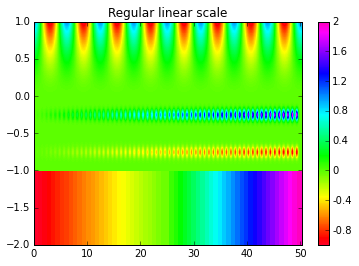

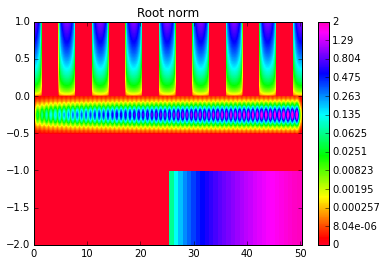

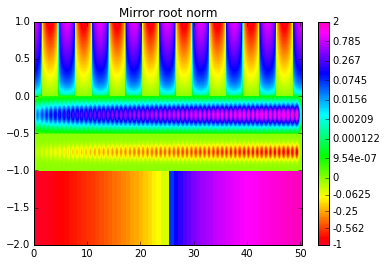

In [2]:
"""
============================================
Examples of colormap root normalization
============================================

Here I plot an image array with data spanning for a large dynamic range,
using different normalizations. Look at how each of them enhances
different features.

"""

import ArbitraryNorm as colors

import numpy as np
# import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xmax = 16 * np.pi
x = np.linspace(0, xmax, 1024)
y = np.linspace(-2, 1, 512)
X, Y = np.meshgrid(x, y)

data = np.zeros(X.shape)


def gauss2d(x, y, a0, x0, y0, wx, wy):
    return a0 * np.exp(-(x - x0)**2 / wx**2 - (y - y0)**2 / wy**2)

N = 61
for i in range(N):
    data = data + gauss2d(X, Y, 2. * i / N, i *
                          (xmax / N), -0.25, xmax / (3 * N), 0.07)
    data = data - gauss2d(X, Y, 1. * i / N, i *
                          (xmax / N), -0.75, xmax / (3 * N), 0.07)

data[Y > 0] = np.cos(X[Y > 0]) * Y[Y > 0]**2

N = 61
for i, val in enumerate(np.linspace(-1, 1, N)):
    if val < 0:
        aux = val
    if val > 0:
        aux = val * 2
    data[(X > (i * (xmax / N))) * (Y < -1)] = aux

cmap = cm.gist_rainbow


def makePlot(norm, label):
    fig, ax = plt.subplots()
    cax = ax.pcolormesh(x, y, data, cmap=cmap, norm=norm)
    ax.set_title(label)
    ax.set_xlim(0, xmax)
    ax.set_ylim(-2, 1)
    if norm:
        ticks = norm.ticks()
    else:
        ticks = None
    cbar = fig.colorbar(cax, format='%.3g', ticks=ticks)


makePlot(None, 'Regular linear scale')

norm = colors.RootNorm(vmin=0, order=5)
makePlot(norm, 'Root norm')

norm = colors.MirrorRootNorm(
    orderpos=7, orderneg=2, center_cm=0.3, center_data=0.)
makePlot(norm, 'Mirror root norm')